In [1]:
import pandas as pd

word_freq_file = "test.csv"
df = pd.read_csv(word_freq_file)


In [7]:
print("number of words in corpus: {}".format(len(df)))
print("highest frequency: {}".format(df.iloc[0]['freq']))

number of words in corpus: 440546
highest frequency: 6513294


<AxesSubplot:>

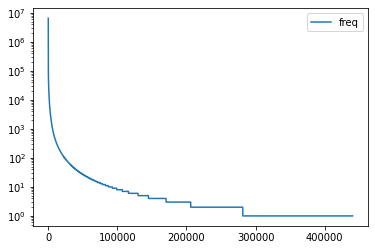

In [9]:
df.plot(y='freq', logy=True, use_index=True)